In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
mobile_df = pd.read_csv("user_behavior_dataset.csv")
mobile_df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


In [3]:
mobile_df = mobile_df.rename(columns={'App Usage Time (min/day)': 'App Usage Time', 'Screen On Time (hours/day)': 'Screen On Time', 
                                      'Battery Drain (mAh/day)': 'Battery Drain', 'Data Usage (MB/day)': 'Data Usage'})

#Select relevant columns
selected_columns = ['App Usage Time', 'Screen On Time', 'Battery Drain', 'Data Usage']
mobile_df = mobile_df[selected_columns]
mobile_df.head(10)

,App Usage Time,Screen On Time,Battery Drain,Data Usage
0,393,6.4,1872,1122
1,268,4.7,1331,944
2,154,4.0,761,322
3,239,4.8,1676,871
4,187,4.3,1367,988
5,99,2.0,940,564
6,350,7.3,1802,1054
7,543,11.4,2956,1702
8,340,7.7,2138,1053
9,424,6.6,1957,1301


In [4]:
# Standardize the data
scaler = StandardScaler()
standardized = scaler.fit_transform(mobile_df)

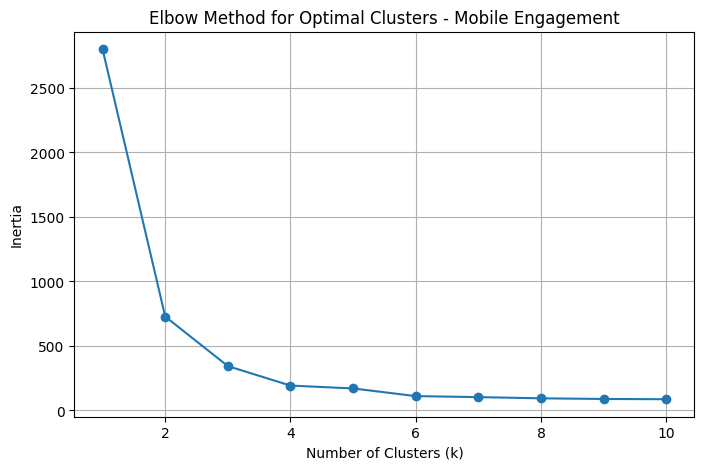

In [5]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=50)
    kmeans.fit(standardized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters - Mobile Engagement')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()